In [1]:
%run Main.ipynb
%run RedshiftDrift.ipynb
%run AlphaVariation.ipynb

# Redshift Drift + Alpha Variation
### Bekenstein (flat ΛCDM case) $(\zeta_\Lambda = \zeta_m = -0.1)$

In [2]:
#Redshift(h,OmegaM)
BEK_Red_Liske = FisherMatrix_z(zLiske,unc_zLiske,h, OmegaM=0.3, w0=None, wa=None, NrYears=20, analysis = 'redshift')
BEK_Red_Liske = add1DPriors(BEK_Red_Liske, [[unch,0],[uncOmegaM,1]])

BEK_Red_GoldenSample = FisherMatrix_z(zGoldenSample,unc_zGoldenSample,h, OmegaM=0.3, w0=None, wa=None, NrYears=25, analysis = 'redshift')
BEK_Red_GoldenSample = add1DPriors(BEK_Red_GoldenSample, [[unch,0],[uncOmegaM,1]])



#Alpha(OmegaM,zetaM,zetaL)
BEK_AlphaB = BEK_AlphaB
BEK_AlphaO = BEK_AlphaO


#Redshift+Alpha(h,OmegaM,zetaM,zetaL)
BEKRedalpha_Liske = FisherMatrix_z(zLiske,unc_zLiske,h, OmegaM=0.3, w0=None, wa=None, NrYears=20, analysis = 'redshift+alpha')
BEKRedalpha_GoldenSample = FisherMatrix_z(zGoldenSample,unc_zGoldenSample,h, OmegaM=0.3, w0=None, wa=None, NrYears=25, analysis = 'redshift+alpha')

##Baseline
BEKBalpha1 = FisherMatrix_ab(zAndes_15baseline, uncAndes_15baseline, OmegaM=0.3, w0=None, wa=None, Zl=-0.1, Zm=-0.1, OCP= 'parameter', analysis = 'redshift+alpha')
BEKBalpha2 = FisherMatrix_ab(zAndes_10baseline, uncAndes_10baseline, OmegaM=0.3, w0=None, wa=None, Zl=-0.1, Zm=-0.1, OCP= 'parameter', analysis = 'redshift+alpha')
BEKBalpha = BEKBalpha1 + BEKBalpha2

FpriorClocksBEK = np.zeros((7,7))
FpriorClocksBEK[4:6,4:6] += FpriorClocks_Oparam

BEK_RedAlphaB_Liske = BEKRedalpha_Liske + BEKBalpha
BEK_RedAlphaB_Liske += FpriorClocksBEK
BEK_RedAlphaB_Liske = add1DPriors(BEK_RedAlphaB_Liske, [[unch,0],[uncOmegaM,1]])
M7_BEK_B = BEK_RedAlphaB_Liske
BEK_RedAlphaB_Liske = np.delete(BEK_RedAlphaB_Liske,[2,3,6],0)
BEK_RedAlphaB_Liske = np.delete(BEK_RedAlphaB_Liske,[2,3,6],1)

BEK_RedAlphaB_GoldenSample = BEKRedalpha_GoldenSample + BEKBalpha
BEK_RedAlphaB_GoldenSample += FpriorClocksBEK
BEK_RedAlphaB_GoldenSample = add1DPriors(BEK_RedAlphaB_GoldenSample, [[unch,0],[uncOmegaM,1]])
BEK_RedAlphaB_GoldenSample = np.delete(BEK_RedAlphaB_GoldenSample,[2,3,6],0)
BEK_RedAlphaB_GoldenSample = np.delete(BEK_RedAlphaB_GoldenSample,[2,3,6],1)


##Optimistic
BEKOalpha1 = FisherMatrix_ab(zAndes_20optimistic, uncAndes_20optimistic, OmegaM=0.3, w0=None, wa=None, Zl=-0.1, Zm=-0.1, OCP= 'parameter', analysis = 'redshift+alpha')
BEKOalpha2 = FisherMatrix_ab(zAndes_15optimistic1, uncAndes_15optimistic1, OmegaM=0.3, w0=None, wa=None, Zl=-0.1, Zm=-0.1, OCP= 'parameter', analysis = 'redshift+alpha')
BEKOalpha3 = FisherMatrix_ab(zAndes_15optimistic2, uncAndes_15optimistic2, OmegaM=0.3, w0=None, wa=None, Zl=-0.1, Zm=-0.1, OCP= 'parameter', analysis = 'redshift+alpha')
BEK_Oalpha = BEKOalpha1 + BEKOalpha2 + BEKOalpha3

BEK_RedAlphaO_Liske = BEKRedalpha_Liske + BEK_Oalpha
BEK_RedAlphaO_Liske += FpriorClocksBEK
BEK_RedAlphaO_Liske = add1DPriors(BEK_RedAlphaO_Liske, [[unch,0],[uncOmegaM,1]])
M7_BEK_O = BEK_RedAlphaO_Liske
BEK_RedAlphaO_Liske = np.delete(BEK_RedAlphaO_Liske,[2,3,6],0)
BEK_RedAlphaO_Liske = np.delete(BEK_RedAlphaO_Liske,[2,3,6],1)

BEK_RedAlphaO_GoldenSample = BEKRedalpha_GoldenSample + BEK_Oalpha
BEK_RedAlphaO_GoldenSample += FpriorClocksBEK
BEK_RedAlphaO_GoldenSample = add1DPriors(BEK_RedAlphaO_GoldenSample, [[unch,0],[uncOmegaM,1]])
BEK_RedAlphaO_GoldenSample = np.delete(BEK_RedAlphaO_GoldenSample,[2,3,6],0)
BEK_RedAlphaO_GoldenSample = np.delete(BEK_RedAlphaO_GoldenSample,[2,3,6],1)

#### - Confidence ellipses (1-sigma)

In [3]:
def BEKRedAlphaZlZm(Zl,Zm,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is BEK_AlphaB:
            Fm = marginalize(Fs[i],'OmegaM',analysis='alpha-BEK')
        if Fs[i] is BEK_AlphaO:
            Fm = marginalize(Fs[i],'OmegaM',analysis='alpha-BEK')
        if Fs[i] is BEK_RedAlphaB_Liske:
            Fm = marginalize(Fs[i],'OmegaM',analysis='red+alpha-BEK')
            Fm = marginalize(Fm,'h',analysis='red+alpha-BEK')
        if Fs[i] is BEK_RedAlphaO_Liske:
            Fm = marginalize(Fs[i],'OmegaM',analysis='red+alpha-BEK')
            Fm = marginalize(Fm,'h',analysis='red+alpha-BEK')
        Pa = preelipse(Fm)
        color,name,style = colornamestyle2(Fs[i])
        ells.append([Zm,Zl, Pa[0],Pa[1],Pa[2],name,color,style])
    ellipses(ells,['$\zeta_m$ (ppm)','$\zeta_\Lambda$ (ppm)'])
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.xlim(-0.25,0.05)
    plt.ylim(-1,0.8)
    #plt.savefig('RedAlphaBEKZlZmO.png', dpi=300, bbox_inches='tight')
    plt.show()
    
#BEKRedAlphaZlZm(-0.1,-0.1,[BEK_AlphaB, BEK_RedAlphaB_Liske])
#BEKRedAlphaZlZm(-0.1,-0.1,[BEK_AlphaO, BEK_RedAlphaO_Liske])

In [4]:
def BEKRedAlphaZlOmegaM(Zl,OmegaM,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is BEK_AlphaB:
            Fm = marginalize(Fs[i],'Zm',analysis='alpha-BEK')
        if Fs[i] is BEK_AlphaO:
            Fm = marginalize(Fs[i],'Zm',analysis='alpha-BEK')
        if Fs[i] is BEK_RedAlphaB_Liske:
            Fm = marginalize(Fs[i],'Zm',analysis='red+alpha-BEK')
            Fm = marginalize(Fm,'h',analysis='red+alpha-BEK')
        if Fs[i] is BEK_RedAlphaO_Liske:
            Fm = marginalize(Fs[i],'Zm',analysis='red+alpha-BEK')
            Fm = marginalize(Fm,'h',analysis='red+alpha-BEK')
        Pa = preelipse(Fm)
        color,name,style = colornamestyle2(Fs[i])
        ells.append([OmegaM,Zl, Pa[0],Pa[1],Pa[2],name,color,style])
    ellipses(ells,['$\Omega_m$','$\zeta_\Lambda$ (ppm)'])
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.xlim(0.2,0.4)
    plt.locator_params(axis="x", nbins=6)
    plt.ylim(-1,0.8)
    #plt.savefig('RedAlphaBEKZlOmegaMO.png', dpi=300, bbox_inches='tight')
    plt.show()
    
#BEKRedAlphaZlOmegaM(-0.1,0.3,[BEK_AlphaB, BEK_RedAlphaB_Liske])
#BEKRedAlphaZlOmegaM(-0.1,0.3,[BEK_AlphaO, BEK_RedAlphaO_Liske])

In [5]:
def BEKRedAlphaZmOmegaM(Zm,OmegaM,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is BEK_AlphaB:
            Fm = marginalize(Fs[i],'Zl',analysis='alpha-BEK',)
        if Fs[i] is BEK_AlphaO:
            Fm = marginalize(Fs[i],'Zl',analysis='alpha-BEK')
        if Fs[i] is BEK_RedAlphaB_Liske:
            Fm = marginalize(Fs[i],'Zl',analysis='red+alpha-BEK')
            Fm = marginalize(Fm,'h',analysis='red+alpha-BEK')
        if Fs[i] is BEK_RedAlphaO_Liske:
            Fm = marginalize(Fs[i],'Zl',analysis='red+alpha-BEK')
            Fm = marginalize(Fm,'h',analysis='red+alpha-BEK')
        Pa = preelipse(Fm)
        color,name,style = colornamestyle2(Fs[i])
        ells.append([OmegaM,Zm, Pa[0],Pa[1],Pa[2],name,color,style])
    ellipses(ells,['$\Omega_m$','$\zeta_m$ (ppm)'])
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.xlim(0.2,0.4)
    plt.locator_params(axis="x", nbins=6)
    plt.ylim(-0.25,0.05)
    #plt.savefig('RedAlphaBEKZmOmegaMO.png', dpi=300, bbox_inches='tight')
    plt.show()
    
#BEKRedAlphaZmOmegaM(-0.1,0.3,[BEK_AlphaB, BEK_RedAlphaB_Liske])
#BEKRedAlphaZmOmegaM(-0.1,0.3,[BEK_AlphaO, BEK_RedAlphaO_Liske])

In [6]:
def BEKRedAlphahOmegaM(h,OmegaM,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is BEK_Red_Liske:
            Fm = BEK_Red_Liske
        if Fs[i] is BEK_RedAlphaB_Liske:
            Fm = marginalize(Fs[i],'Zl',analysis='red+alpha-BEK')
            Fm = marginalize(Fm, 'Zm',analysis='red+alpha-BEK')
        if Fs[i] is BEK_RedAlphaO_Liske:
            Fm = marginalize(Fs[i],'Zl',analysis='red+alpha-BEK')
            Fm = marginalize(Fm,'Zm',analysis='red+alpha-BEK')
        Pa = preelipse(Fm)
        color,name,style = colornamestyle2(Fs[i])
        ells.append([OmegaM,h, Pa[0],Pa[1],Pa[2],name,color,style])
    ellipses(ells,['$\Omega_m$','$h$'])
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.xlim(0.2,0.4)
    plt.ylim(0.6,0.8)
    plt.locator_params(axis="x", nbins=6)
    plt.locator_params(axis="y", nbins=8)
    #plt.savefig('RedAlphaBEKhOmegaMO.png', dpi=300, bbox_inches='tight')
    plt.show()
    
#BEKRedAlphahOmegaM(0.7,0.3,[BEK_Red_Liske, BEK_RedAlphaB_Liske])
#BEKRedAlphahOmegaM(0.7,0.3,[BEK_Red_Liske, BEK_RedAlphaO_Liske])

#### - Table

In [7]:
def tableRedAlphaBEK(matrices):
    i=0
    df=pd.DataFrame()
    nformat = "{:.0f}"
    float_format="{:.3f}"

    for matrix in matrices:
        if matrix[1][1] == BEK_RedAlphaB_Liske[1][1] or matrix[1][1] == BEK_RedAlphaO_Liske[1][1]:
            rows = {'FoM(Zm, Zl)': nformat.format(FigMeriteRho(matrix,['OmegaM','h'],analysis='red+alpha-BEK')[0]),
                    'FoM(Zm, Ωm)': nformat.format(FigMeriteRho(matrix,['Zl','h'],analysis='red+alpha-BEK')[0]),
                    'FoM(Zl, Ωm)': nformat.format(FigMeriteRho(matrix,['Zm','h'],analysis='red+alpha-BEK')[0]),
                    'FoM(Ωm, h)': nformat.format(FigMeriteRho(matrix,['Zm','Zl'],analysis='red+alpha-BEK')[0]),
                    'σ(h)':float_format.format(Sigmas(matrix)[0]),
                    'σ(Ωm)':float_format.format(Sigmas(matrix)[1]),
                    'σ(Zm)':float_format.format(Sigmas(matrix)[2]),
                    'σ(Zl)':float_format.format(Sigmas(matrix)[3])}
            i+=1
            df = df.append(rows,ignore_index=True)
            del rows
            
        if matrix[1][1] == BEK_AlphaB[1][1] or matrix[1][1] == BEK_AlphaO[1][1]:
            rows = {'FoM(Zm, Zl)': nformat.format(FigMeriteRho(matrix,['OmegaM'],analysis='alpha-BEK')[0]),
                'FoM(Zm, Ωm)': nformat.format(FigMeriteRho(matrix,['Zl'],analysis='alpha-BEK')[0]),
                'FoM(Zl, Ωm)': nformat.format(FigMeriteRho(matrix,['Zm'],analysis='alpha-BEK')[0]),
                'FoM(Ωm, h)': '-',
                'σ(h)': '-',
                'σ(Ωm)':float_format.format(Sigmas(matrix)[0]),
                'σ(Zm)':float_format.format(Sigmas(matrix)[1]),
                'σ(Zl)':float_format.format(Sigmas(matrix)[2])}
            i+=1
        
            df = df.append(rows,ignore_index=True)
            del rows
            
        if matrix[1][1] == BEK_Red_Liske[1][1]:
            rows = {'FoM(Zm, Zl)': '-',
                'FoM(Zm, Ωm)': '-',
                'FoM(Zl, Ωm)': '-',
                'FoM(Ωm, h)': nformat.format(FigMeriteRho(matrix,[],analysis='redshift')[0]),
                'σ(h)': float_format.format(Sigmas(matrix)[0]),
                'σ(Ωm)':float_format.format(Sigmas(matrix)[1]),
                'σ(Zm)':'-',
                'σ(Zl)':'-'}
            i+=1
            df = df.append(rows,ignore_index=True)
            del rows
            
    
    Datasets = ['Liske','Baseline', 'Optimistic', 'Liske + Baseline','Liske + Optimistic']
    df.insert(0, "Parameters", Datasets, True)
    df = df.transpose()
          
    return df

In [8]:
#Bekenstein RedAlpha - Liske + Baseline + Optimistic + (Liske+Baseline) + (Liske+Optimistic)

#matricesRedAlphaBEK = [BEK_Red_Liske, BEK_AlphaB, BEK_AlphaO, BEK_RedAlphaB_Liske, BEK_RedAlphaO_Liske]
#tab1 = tableRedAlphaBEK(matricesRedAlphaBEK)

#See the table in DataFrame:
#tab1

#Transform dataframe to latex code:
#print(tab1.to_latex(header=False,index=True))

### CPL $(w_0 = -0.9)$ and $(w_a = 0.3)$

In [9]:
#Redshift(h,OmegaM,w0,wa) - Liske
CPL_Red_Liske1 = FisherMatrix_z(zLiske,unc_zLiske,h, OmegaM=0.3, w0=-0.9, wa=0.3, NrYears=20, analysis = 'redshift')
CPL_Red_Liske = add1DPriors(CPL_Red_Liske1, [[unch,0],[uncOmegaM,1],[uncw0Cur,2], [uncwaCur,3]])

CPL_Red_GoldenSample = FisherMatrix_z(zGoldenSample,unc_zGoldenSample,h, OmegaM=0.3, w0=-0.9, wa=0.3, NrYears=25, analysis = 'redshift')
CPL_Red_GoldenSample = add1DPriors(CPL_Red_GoldenSample, [[unch,0],[uncOmegaM,1],[uncw0Cur,2], [uncwaCur,3]])


#Alpha(OmegaM,w0,wa,zeta)
CPL_AlphaB = CPL_AlphaB
CPL_AlphaO = CPL_AlphaO

#Redshift+Alpha(h,OmegaM,w0,wa,zeta)
CPLRedalpha_Liske = FisherMatrix_z(zLiske,unc_zLiske,h, OmegaM=0.3, w0=-0.9, wa=0.3, NrYears=20, analysis = 'redshift+alpha')
CPLRedalpha_GoldenSample = FisherMatrix_z(zGoldenSample,unc_zGoldenSample,h, OmegaM=0.3, w0=-0.9, wa=0.3, NrYears=25, analysis = 'redshift+alpha')


##Baseline
CPLBalpha1 = FisherMatrix_aCPL(zAndes_15baseline, uncAndes_15baseline, OmegaM=0.3, w0=-0.9, wa=0.3, zeta=-0.1, analysis = 'redshift+alpha')
CPLBalpha2 = FisherMatrix_aCPL(zAndes_10baseline, uncAndes_10baseline, OmegaM=0.3, w0=-0.9, wa=0.3, zeta=-0.1, analysis = 'redshift+alpha')
CPLBalpha = CPLBalpha1 + CPLBalpha2

CPL_RedAlphaB_Liske = CPLRedalpha_Liske + CPLBalpha
CPL_RedAlphaB_Liske = add1DPriors(CPL_RedAlphaB_Liske, [[unch,0],[uncOmegaM,1],[uncw0Cur,2],[uncwaCur,3],[unczeta,6]])
M7_CPL_B = CPL_RedAlphaB_Liske
CPL_RedAlphaB_Liske = np.delete(CPL_RedAlphaB_Liske,[4,5],0)
CPL_RedAlphaB_Liske = np.delete(CPL_RedAlphaB_Liske,[4,5],1)

CPL_RedAlphaB_GoldenSample = CPLRedalpha_GoldenSample + CPLBalpha
CPL_RedAlphaB_GoldenSample = add1DPriors(CPL_RedAlphaB_GoldenSample, [[unch,0],[uncOmegaM,1],[uncw0Cur,2],[uncwaCur,3],[unczeta,6]])
CPL_RedAlphaB_GoldenSample = np.delete(CPL_RedAlphaB_GoldenSample,[4,5],0)
CPL_RedAlphaB_GoldenSample = np.delete(CPL_RedAlphaB_GoldenSample,[4,5],1)


##Optimistic

CPLOalpha1 = FisherMatrix_aCPL(zAndes_20optimistic, uncAndes_20optimistic, OmegaM=0.3, w0=-0.9, wa=0.3, zeta=-0.1, analysis = 'redshift+alpha')
CPLOalpha2 = FisherMatrix_aCPL(zAndes_15optimistic1, uncAndes_15optimistic1, OmegaM=0.3, w0=-0.9, wa=0.3, zeta=-0.1, analysis = 'redshift+alpha')
CPLOalpha3 = FisherMatrix_aCPL(zAndes_15optimistic2, uncAndes_15optimistic2, OmegaM=0.3, w0=-0.9, wa=0.3, zeta=-0.1, analysis = 'redshift+alpha')
CPLOalpha = CPLOalpha1 + CPLOalpha2 + CPLOalpha3

CPL_RedAlphaO_Liske = CPLRedalpha_Liske + CPLOalpha
CPL_RedAlphaO_Liske = add1DPriors(CPL_RedAlphaO_Liske, [[unch,0],[uncOmegaM,1],[uncw0Cur,2],[uncwaCur,3],[unczeta,6]])
M7_CPL_O = CPL_RedAlphaO_Liske
CPL_RedAlphaO_Liske = np.delete(CPL_RedAlphaO_Liske,[4,5],0)
CPL_RedAlphaO_Liske = np.delete(CPL_RedAlphaO_Liske,[4,5],1)


CPL_RedAlphaO_GoldenSample = CPLRedalpha_GoldenSample + CPLOalpha
CPL_RedAlphaO_GoldenSample = add1DPriors(CPL_RedAlphaO_GoldenSample, [[unch,0],[uncOmegaM,1],[uncw0Cur,2],[uncwaCur,3],[unczeta,6]])
CPL_RedAlphaO_GoldenSample = np.delete(CPL_RedAlphaO_GoldenSample,[4,5],0)
CPL_RedAlphaO_GoldenSample = np.delete(CPL_RedAlphaO_GoldenSample,[4,5],1)

In [10]:
M7_CPL_B

array([[ 506.98146061,  550.68110588,   52.23490854,   25.93232237,
           0.        ,    0.        ,    0.        ],
       [ 550.68110588, 4203.46160791,  297.64550021,  146.9444539 ,
           0.        ,    0.        ,   64.24303802],
       [  52.23490854,  297.64550021,  178.59118989,   30.43445543,
           0.        ,    0.        , -140.18266921],
       [  25.93232237,  146.9444539 ,   30.43445543,   23.4661153 ,
           0.        ,    0.        ,  -44.71719929],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ],
       [   0.        ,   64.24303802, -140.18266921,  -44.71719929,
           0.        ,    0.        ,  451.57890275]])

#### - Confidence ellipses (1-sigma)

In [11]:
def RedAlphazetawa(wa,zeta,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is CPL_AlphaB:
            Fm = marginalize(Fs[i],'w0',analysis='alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='alpha-CPL')
        if Fs[i] is CPL_AlphaO:
            Fm = marginalize(Fs[i],'w0',analysis='alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='alpha-CPL')
        if Fs[i] is CPL_Red_Liske:
            Fm = marginalize(Fs[i],'w',analysis='redshift')
            Fm = marginalize(Fm,'h',analysis='redshift')
        if Fs[i] is CPL_RedAlphaB_Liske:
            Fm = marginalize(Fs[i],'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
        if Fs[i] is CPL_RedAlphaO_Liske:
            Fm = marginalize(Fs[i],'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
        Pa = preelipse(Fm)
        color,name,style = colornamestyle2(Fs[i])
        ells.append([wa,zeta, Pa[0],Pa[1],Pa[2],name,color,style])
    ellipses(ells,['$w_a$','$\zeta$ (ppm)'])
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.xlim(-0.4,1.0)
    plt.ylim(-0.25,0.05)
    #plt.savefig('RedAlphaCPLZetawaO.png', dpi=300, bbox_inches='tight')
    plt.show()

#RedAlphazetawa(0.3,-0.1,[CPL_AlphaB, CPL_RedAlphaB_Liske])
#RedAlphazetawa(0.3,-0.1,[CPL_AlphaO, CPL_RedAlphaO_Liske])

In [12]:
def RedAlphazetaw0(w0,zeta,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is CPL_AlphaB:
            Fm = marginalize(Fs[i],'wa',analysis='alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='alpha-CPL')
        if Fs[i] is CPL_AlphaO:
            Fm = marginalize(Fs[i],'wa',analysis='alpha-CPL')
            Fm = marginalize(Fm, 'OmegaM',analysis='alpha-CPL')
        if Fs[i] is CPL_RedAlphaB_Liske:
            Fm = marginalize(Fs[i],'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
        if Fs[i] is CPL_RedAlphaO_Liske:
            Fm = marginalize(Fs[i],'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
        Pa = preelipse(Fm)
        color,name,style = colornamestyle2(Fs[i])
        ells.append([w0,zeta, Pa[0],Pa[1],Pa[2],name,color,style])
    ellipses(ells,['$w_0$','$\zeta$ (ppm)'])
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.xlim(-1.2,-0.6)
    plt.ylim(-0.25,0.05)
    #plt.savefig('RedAlphaCPLZetaw0O.png', dpi=300, bbox_inches='tight')
    plt.show()
    
#RedAlphazetaw0(-0.9,-0.1,[CPL_AlphaB, CPL_RedAlphaB_Liske])
#RedAlphazetaw0(-0.9,-0.1,[CPL_AlphaO, CPL_RedAlphaO_Liske])

In [13]:
def RedAlphazetaOmegaM(OmegaM,zeta,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is CPL_AlphaB:
            Fm = marginalize(Fs[i],'wa',analysis='alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='alpha-CPL')
        if Fs[i] is CPL_AlphaO:
            Fm = marginalize(Fs[i],'wa',analysis='alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='alpha-CPL')
        if Fs[i] is CPL_RedAlphaB_Liske:
            Fm = marginalize(Fs[i],'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
        if Fs[i] is CPL_RedAlphaO_Liske:
            Fm = marginalize(Fs[i],'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
        Pa = preelipse(Fm)
        color,name,style = colornamestyle2(Fs[i])
        ells.append([OmegaM,zeta, Pa[0],Pa[1],Pa[2],name,color,style])
    ellipses(ells,['$\Omega_m$','$\zeta$ (ppm)'])
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.xlim(0.24,0.36)
    plt.ylim(-0.25,0.05)
    #plt.savefig('RedAlphaCPLZetaOmegaMO.png', dpi=300, bbox_inches='tight')
    plt.show()
    
#RedAlphazetaOmegaM(0.3,-0.1,[CPL_AlphaB, CPL_RedAlphaB_Liske])
#RedAlphazetaOmegaM(0.3,-0.1,[CPL_AlphaO, CPL_RedAlphaO_Liske])

In [14]:
def RedAlphaw0wa(w0,wa,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is CPL_AlphaB:
            Fm = marginalize(Fs[i],'zeta',analysis='alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='alpha-CPL')
        if Fs[i] is CPL_AlphaO:
            Fm = marginalize(Fs[i],'zeta',analysis='alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='alpha-CPL')
        if Fs[i] is CPL_Red_Liske:
            Fm = marginalize(Fs[i],'OmegaM',analysis='redshift')
            Fm = marginalize(Fm,'h',analysis='redshift')
        if Fs[i] is CPL_RedAlphaB_Liske:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
        if Fs[i] is CPL_RedAlphaO_Liske:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')    
        Pa = preelipse(Fm)
        color,name,style = colornamestyle2(Fs[i])
        ells.append([w0,wa, Pa[0],Pa[1],Pa[2],name,color,style])
    ellipses(ells,['$w_0$','$w_a$'])
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.xlim(-1.2,-0.6)
    plt.ylim(-0.4,1)
    #plt.savefig('RedAlphaCPLw0waO.png', dpi=300, bbox_inches='tight')
    plt.show()
    
#RedAlphaw0wa(-0.9,0.3,[CPL_Red_Liske, CPL_RedAlphaB_Liske, CPL_AlphaB])
#RedAlphaw0wa(-0.9,0.3,[CPL_Red_Liske, CPL_RedAlphaO_Liske, CPL_AlphaO])

In [15]:
def RedAlphaOmegaMwa(OmegaM,wa,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is CPL_AlphaB:
            Fm = marginalize(Fs[i],'zeta',analysis='alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='alpha-CPL')
        if Fs[i] is CPL_AlphaO:
            Fm = marginalize(Fs[i],'zeta',analysis='alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='alpha-CPL')
        if Fs[i] is CPL_Red_Liske:
            Fm = marginalize(Fs[i],'w0',analysis='redshift')
            Fm = marginalize(Fm,'h',analysis='redshift')
        if Fs[i] is CPL_RedAlphaB_Liske:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
        if Fs[i] is CPL_RedAlphaO_Liske:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
        Pa = preelipse(Fm)
        color,name,style = colornamestyle2(Fs[i])
        ells.append([OmegaM,wa, Pa[0],Pa[1],Pa[2],name,color,style])
    ellipses(ells,['$\Omega_m$','$w_a$'])
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.xlim(0.24,0.36)
    plt.ylim(-0.4,1)
    #plt.savefig('RedAlphaCPLOmegaMwaO.png', dpi=300, bbox_inches='tight')
    plt.show()
    
#RedAlphaOmegaMwa(0.3,0.3,[CPL_Red_Liske, CPL_RedAlphaB_Liske, CPL_AlphaB])
#RedAlphaOmegaMwa(0.3,0.3,[CPL_Red_Liske, CPL_RedAlphaO_Liske, CPL_AlphaO])

In [16]:
def RedAlphahwa(h,wa,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is CPL_Red_Liske:
            Fm = marginalize(Fs[i],'w0',analysis='redshift')
            Fm = marginalize(Fm,'OmegaM',analysis='redshift')
        if Fs[i] is CPL_RedAlphaB_Liske:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
        if Fs[i] is CPL_RedAlphaO_Liske:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
        Pa = preelipse(Fm)
        color,name,style = colornamestyle2(Fs[i])
        ells.append([h,wa, Pa[0],Pa[1],Pa[2],name,color,style])
    ellipses(ells,['$h$','$w_a$'])
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.locator_params(axis="x", nbins=5)
    plt.xlim(0.6,0.8)
    plt.ylim(-0.4,1)
    #plt.savefig('RedAlphaCPLhWaO.png', dpi=300, bbox_inches='tight')
    plt.show()
    
#RedAlphahwa(0.7,0.3,[CPL_Red_Liske, CPL_RedAlphaB_Liske])
#RedAlphahwa(0.7,0.3,[CPL_Red_Liske, CPL_RedAlphaO_Liske])

In [17]:
def RedAlphaOmegaMw0(OmegaM,w0,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is CPL_AlphaB:
            Fm = marginalize(Fs[i],'zeta',analysis='alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='alpha-CPL')
        if Fs[i] is CPL_AlphaO:
            Fm = marginalize(Fs[i],'zeta',analysis='alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='alpha-CPL')
        if Fs[i] is CPL_Red_Liske:
            Fm = marginalize(Fs[i],'wa',analysis='redshift')
            Fm = marginalize(Fm,'h',analysis='redshift')
        if Fs[i] is CPL_RedAlphaB_Liske:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
        if Fs[i] is CPL_RedAlphaO_Liske:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
        Pa = preelipse(Fm)
        color,name,style = colornamestyle2(Fs[i])
        ells.append([OmegaM,w0, Pa[0],Pa[1],Pa[2],name,color,style])
    ellipses(ells,['$\Omega_m$','$w_0$'])
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.xlim(0.24,0.36)
    plt.ylim(-1.2,-0.6)
    #plt.savefig('RedAlphaCPLOmegaMw0O.png', dpi=300, bbox_inches='tight')
    plt.show()
    
#RedAlphaOmegaMw0(0.3,-0.9,[CPL_Red_Liske, CPL_RedAlphaB_Liske, CPL_AlphaB])
#RedAlphaOmegaMw0(0.3,-0.9,[CPL_Red_Liske, CPL_RedAlphaO_Liske, CPL_AlphaO])

In [18]:
def RedAlphahw0(h,w0,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is CPL_Red_Liske:
            Fm = marginalize(Fs[i],'wa',analysis='redshift')
            Fm = marginalize(Fm,'OmegaM',analysis='redshift')
        if Fs[i] is CPL_RedAlphaB_Liske:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
        if Fs[i] is CPL_RedAlphaO_Liske:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
        Pa = preelipse(Fm)
        color,name,style = colornamestyle2(Fs[i])
        ells.append([h,w0, Pa[0],Pa[1],Pa[2],name,color,style])
    ellipses(ells,['$h$','$w_0$'])
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.locator_params(axis="x", nbins=5)
    plt.xlim(0.6,0.8)
    plt.ylim(-1.2,-0.6)
    #plt.savefig('RedAlphaCPLhw0O.png', dpi=300, bbox_inches='tight')
    plt.show()
    
#RedAlphahw0(0.7,-0.9,[CPL_Red_Liske, CPL_RedAlphaB_Liske])
#RedAlphahw0(0.7,-0.9,[CPL_Red_Liske, CPL_RedAlphaO_Liske])

In [19]:
def RedAlphahOmegaM(h,OmegaM,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is CPL_Red_Liske:
            Fm = marginalize(Fs[i],'wa',analysis='redshift')
            Fm = marginalize(Fm,'w0',analysis='redshift')
        if Fs[i] is CPL_RedAlphaB_Liske:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
        if Fs[i] is CPL_RedAlphaO_Liske:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
        Pa = preelipse(Fm)
        color,name,style = colornamestyle2(Fs[i])
        ells.append([h,OmegaM, Pa[0],Pa[1],Pa[2],name,color,style])
    ellipses(ells,['$h$','$\Omega_m$'])
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.locator_params(axis="x", nbins=5)
    plt.xlim(0.6,0.8)
    plt.ylim(0.24,0.36)
    #plt.savefig('RedAlphaCPLOmegaMw0O.png', dpi=300, bbox_inches='tight')
    plt.show()
    
#RedAlphahOmegaM(0.7,0.3,[CPL_Red_Liske, CPL_RedAlphaB_Liske])
#RedAlphahOmegaM(0.7,0.3,[CPL_Red_Liske, CPL_RedAlphaO_Liske])

#### - Table

In [20]:
def tableRedAlphaCPL(matrices):
    i=0
    df=pd.DataFrame()
    nformat = "{:.0f}"
    float_format="{:.3f}"

    for matrix in matrices:
        if matrix[1][1] == CPL_RedAlphaB_Liske[1][1] or matrix[1][1] == CPL_RedAlphaO_Liske[1][1]:
            rows = {'FoM(zeta, wa)': nformat.format(FigMeriteRho(matrix,['w0','OmegaM','h'],analysis='red+alpha-CPL')[0]),
                    'FoM(zeta, w0)': nformat.format(FigMeriteRho(matrix,['wa','OmegaM','h'],analysis='red+alpha-CPL')[0]),
                    'FoM(zeta, Ωm)': nformat.format(FigMeriteRho(matrix,['wa','w0','h'],analysis='red+alpha-CPL')[0]),
                    'FoM(wa, w0)': nformat.format(FigMeriteRho(matrix,['zeta','OmegaM','h'],analysis='red+alpha-CPL')[0]),
                    'FoM(wa, Ωm)': nformat.format(FigMeriteRho(matrix,['zeta','w0','h'],analysis='red+alpha-CPL')[0]),
                    'FoM(w0, Ωm)': nformat.format(FigMeriteRho(matrix,['zeta','wa','h'],analysis='red+alpha-CPL')[0]),
                    'FoM(wa, h)': nformat.format(FigMeriteRho(matrix,['zeta','w0','OmegaM'],analysis='red+alpha-CPL')[0]),
                    'FoM(w0, h)': nformat.format(FigMeriteRho(matrix,['zeta','wa','OmegaM'],analysis='red+alpha-CPL')[0]),
                    'FoM(Ωm, h)': nformat.format(FigMeriteRho(matrix,['zeta','wa','w0'],analysis='red+alpha-CPL')[0]),
                    'σ(h)':float_format.format(Sigmas(matrix)[0]),
                    'σ(Ωm)':float_format.format(Sigmas(matrix)[1]),
                    'σ(w0)':float_format.format(Sigmas(matrix)[2]),
                    'σ(wa)':float_format.format(Sigmas(matrix)[3]),
                    'σ(zeta)':float_format.format(Sigmas(matrix)[4])}
            i+=1
            df = df.append(rows,ignore_index=True)
            del rows
            
        if matrix[1][1] == CPL_AlphaB[1][1] or matrix[1][1] == CPL_AlphaO[1][1]:
            rows = {'FoM(zeta, wa)': nformat.format(FigMeriteRho(matrix,['w0','OmegaM'],analysis='alpha-CPL')[0]),
                'FoM(zeta, w0)': nformat.format(FigMeriteRho(matrix,['wa','OmegaM'],analysis='alpha-CPL')[0]),
                'FoM(zeta, Ωm)': nformat.format(FigMeriteRho(matrix,['wa','w0'],analysis='alpha-CPL')[0]),
                'FoM(wa, w0)': nformat.format(FigMeriteRho(matrix,['zeta','OmegaM'],analysis='alpha-CPL')[0]),
                'FoM(wa, Ωm)': nformat.format(FigMeriteRho(matrix,['zeta','w0'],analysis='alpha-CPL')[0]),
                'FoM(w0, Ωm)': nformat.format(FigMeriteRho(matrix,['zeta','wa'],analysis='alpha-CPL')[0]),
                'FoM(wa, h)': '-',
                'FoM(w0, h)': '-',
                'FoM(Ωm, h)': '-',
                'σ(h)': '-',
                'σ(Ωm)':float_format.format(Sigmas(matrix)[0]),
                'σ(w0)':float_format.format(Sigmas(matrix)[1]),
                'σ(wa)':float_format.format(Sigmas(matrix)[2]),
                'σ(zeta)':float_format.format(Sigmas(matrix)[3])}
            i+=1
            df = df.append(rows,ignore_index=True)
            del rows
            
        if matrix[1][1] == CPL_Red_Liske[1][1]:
            rows = {'FoM(zeta, wa)': '-',
                'FoM(zeta, w0)': '-',
                'FoM(zeta, Ωm)': '-',
                'FoM(wa, w0)': nformat.format(FigMeriteRho(matrix,['OmegaM','h'],analysis='redshift')[0]),
                'FoM(wa, Ωm)': nformat.format(FigMeriteRho(matrix,['w0','h'],analysis='redshift')[0]),
                'FoM(w0, Ωm)': nformat.format(FigMeriteRho(matrix,['wa','h'],analysis='redshift')[0]),
                'FoM(wa, h)': nformat.format(FigMeriteRho(matrix,['w0','OmegaM'],analysis='redshift')[0]),
                'FoM(w0, h)': nformat.format(FigMeriteRho(matrix,['wa','OmegaM'],analysis='redshift')[0]),
                'FoM(Ωm, h)': nformat.format(FigMeriteRho(matrix,['wa','w0'],analysis='redshift')[0]),
                'σ(h)': float_format.format(Sigmas(matrix)[0]),
                'σ(Ωm)':float_format.format(Sigmas(matrix)[1]),
                'σ(w0)':float_format.format(Sigmas(matrix)[2]),
                'σ(wa)':float_format.format(Sigmas(matrix)[3]),
                'σ(zeta)':'-'}
            i+=1
            df = df.append(rows,ignore_index=True)
            del rows
            
    
    Datasets = ['Liske','Baseline', 'Optimistic', 'Liske + Baseline','Liske + Optimistic']
    df.insert(0, "Parameters", Datasets, True)
    df = df.transpose()
    
            
    return df

In [21]:
#CPL RedAlpha - Liske + Baseline + Optimistic + (Liske+Baseline) + (Liske+Optimistic)

#matricesRedAlphaCPL = [CPL_Red_Liske, CPL_AlphaB, CPL_AlphaO, CPL_RedAlphaB_Liske, CPL_RedAlphaO_Liske]
#tab1 = tableRedAlphaCPL(matricesRedAlphaCPL)

#See the table in DataFrame:
#tab1

#Transform dataframe to latex code:
#print(tab1.to_latex(header=False,index=True))

### CPL $(w_0 = -1)$ and $(w_a = 0)$

In [22]:
#Redshift(h,OmegaM) - Liske
CPLLCDM_Red_Liske1 = FisherMatrix_z(zLiske,unc_zLiske,h, OmegaM=0.3, w0=None, wa=None, NrYears=20, analysis = 'redshift')
CPLLCDM_Red_Liske = add1DPriors(CPLLCDM_Red_Liske1, [[unch,0],[uncOmegaM,1]])

#CPL_Red_GoldenSample = FisherMatrix_z(zGoldenSample,unc_zGoldenSample,h, OmegaM=0.3, w0=-0.9, wa=0.3, NrYears=25, analysis = 'redshift')
#CPL_Red_GoldenSample = add1DPriors(CPL_Red_GoldenSample, [[unch,0],[uncOmegaM,1],[uncw0Cur,2], [uncwaCur,3]])


#Alpha(OmegaM,zeta)
CPLLCDM_AlphaB = CPLLCDM_AlphaB
CPLLCDM_AlphaO = CPLLCDM_AlphaO


#Redshift+Alpha(h,OmegaM,w0,wa,zeta)
CPLLCDMRedalpha_Liske = FisherMatrix_z(zLiske,unc_zLiske,h, OmegaM=0.3, w0=-1, wa=0, NrYears=20, analysis = 'redshift+alpha')


##Baseline
CPLLCDMBalpha1 = FisherMatrix_aCPL(zAndes_15baseline, uncAndes_15baseline, OmegaM=0.3, w0=-1, wa=0, zeta=-0.1, analysis = 'redshift+alpha')
CPLLCDMBalpha2 = FisherMatrix_aCPL(zAndes_10baseline, uncAndes_10baseline, OmegaM=0.3, w0=-1, wa=0, zeta=-0.1, analysis = 'redshift+alpha')
CPLLCDMBalpha = CPLLCDMBalpha1 + CPLLCDMBalpha2

CPLLCDM_RedAlphaB_Liske = CPLLCDMRedalpha_Liske + CPLLCDMBalpha
CPLLCDM_RedAlphaB_Liske = add1DPriors(CPLLCDM_RedAlphaB_Liske, [[unch,0],[uncOmegaM,1]])
M7_CPLLCDM_B = CPLLCDM_RedAlphaB_Liske
CPLLCDM_RedAlphaB_Liske = np.delete(CPLLCDM_RedAlphaB_Liske,[2,3,4,5,6],0)
CPLLCDM_RedAlphaB_Liske = np.delete(CPLLCDM_RedAlphaB_Liske,[2,3,4,5,6],1)



##Optimistic
CPLLCDMOalpha1 = FisherMatrix_aCPL(zAndes_20optimistic, uncAndes_20optimistic, OmegaM=0.3, w0=-1, wa=0, zeta=-0.1, analysis = 'redshift+alpha')
CPLLCDMOalpha2 = FisherMatrix_aCPL(zAndes_15optimistic1, uncAndes_15optimistic1, OmegaM=0.3, w0=-1, wa=0, zeta=-0.1, analysis = 'redshift+alpha')
CPLLCDMOalpha3 = FisherMatrix_aCPL(zAndes_15optimistic2, uncAndes_15optimistic2, OmegaM=0.3, w0=-1, wa=0, zeta=-0.1, analysis = 'redshift+alpha')
CPLLCDMOalpha = CPLLCDMOalpha1 + CPLLCDMOalpha2 + CPLLCDMOalpha3

CPLLCDM_RedAlphaO_Liske = CPLLCDMRedalpha_Liske + CPLLCDMOalpha
CPLLCDM_RedAlphaO_Liske = add1DPriors(CPLLCDM_RedAlphaO_Liske, [[unch,0],[uncOmegaM,1]])
M7_CPLLCDM_O = CPLLCDM_RedAlphaO_Liske
CPLLCDM_RedAlphaO_Liske = np.delete(CPLLCDM_RedAlphaO_Liske,[2,3,4,5,6],0)
CPLLCDM_RedAlphaO_Liske = np.delete(CPLLCDM_RedAlphaO_Liske,[2,3,4,5,6],1)

### Bekenstein $(\zeta_\Lambda = \zeta_m = 0)$

In [23]:
#Redshift(h,OmegaM)
BEK0_Red_Liske = FisherMatrix_z(zLiske,unc_zLiske,h, OmegaM=0.3, w0=None, wa=None, NrYears=20, analysis = 'redshift')
BEK0_Red_Liske = add1DPriors(BEK_Red_Liske, [[unch,0],[uncOmegaM,1]])


#Alpha(OmegaM,zetaM,zetaL)
BEK0_AlphaB = BEK0_AlphaB
BEK0_AlphaO = BEK0_AlphaO


#Redshift+Alpha(h,OmegaM,zetaM,zetaL)
BEK0Redalpha_Liske = FisherMatrix_z(zLiske,unc_zLiske,h, OmegaM=0.3, w0=None, wa=None, NrYears=20, analysis = 'redshift+alpha')

##Baseline
BEK0Balpha1 = FisherMatrix_ab(zAndes_15baseline, uncAndes_15baseline, OmegaM=0.3, w0=None, wa=None, Zl=0, Zm=0, OCP= 'parameter', analysis = 'redshift+alpha')
BEK0Balpha2 = FisherMatrix_ab(zAndes_10baseline, uncAndes_10baseline, OmegaM=0.3, w0=None, wa=None, Zl=0, Zm=0, OCP= 'parameter', analysis = 'redshift+alpha')
BEK0Balpha = BEK0Balpha1 + BEK0Balpha2

#FpriorClocksBEK = np.zeros((7,7))
#FpriorClocksBEK[4:6,4:6] += FpriorClocks_Oparam

BEK0_RedAlphaB_Liske = BEK0Redalpha_Liske + BEK0Balpha
#BEK_RedAlphaB_Liske += FpriorClocksBEK
BEK0_RedAlphaB_Liske = add1DPriors(BEK0_RedAlphaB_Liske, [[unch,0],[uncOmegaM,1]])
M7_BEK0_B = BEK0_RedAlphaB_Liske
BEK0_RedAlphaB_Liske = np.delete(BEK0_RedAlphaB_Liske,[2,3,4,5,6],0)
BEK0_RedAlphaB_Liske = np.delete(BEK0_RedAlphaB_Liske,[2,3,4,5,6],1)


##Optimistic
BEK0Oalpha1 = FisherMatrix_ab(zAndes_20optimistic, uncAndes_20optimistic, OmegaM=0.3, w0=None, wa=None, Zl=0, Zm=0, OCP= 'parameter', analysis = 'redshift+alpha')
BEK0Oalpha2 = FisherMatrix_ab(zAndes_15optimistic1, uncAndes_15optimistic1, OmegaM=0.3, w0=None, wa=None, Zl=0, Zm=0, OCP= 'parameter', analysis = 'redshift+alpha')
BEK0Oalpha3 = FisherMatrix_ab(zAndes_15optimistic2, uncAndes_15optimistic2, OmegaM=0.3, w0=None, wa=None, Zl=0, Zm=0, OCP= 'parameter', analysis = 'redshift+alpha')
BEK0_Oalpha = BEK0Oalpha1 + BEK0Oalpha2 + BEK0Oalpha3

BEK0_RedAlphaO_Liske = BEK0Redalpha_Liske + BEK0_Oalpha
#BEK_RedAlphaO_Liske += FpriorClocksBEK
BEK0_RedAlphaO_Liske = add1DPriors(BEK0_RedAlphaO_Liske, [[unch,0],[uncOmegaM,1]])
M7_BEK0_O = BEK0_RedAlphaO_Liske
BEK0_RedAlphaO_Liske = np.delete(BEK0_RedAlphaO_Liske,[2,3,4,5,6],0)
BEK0_RedAlphaO_Liske = np.delete(BEK0_RedAlphaO_Liske,[2,3,4,5,6],1)


# Likelihoods

In [24]:
def Standardization(values):
    values_norm = (values - values.min())/ (values.max() - values.min())
    return values_norm

In [25]:
#Parameter Variation
values_h = np.linspace(-(unch+2.5),(unch+2.5),num=5000)
values_OmegaM = np.linspace(-(uncOmegaM+2.5),(uncOmegaM+2.5),num=5000)
values_w0 = np.linspace(-(uncw0Cur+2.5),(uncw0Cur+2.5),num=5000)
values_wa = np.linspace(-(uncwaCur+2.5),(uncwaCur+2.5),num=5000)
values_zeta = np.linspace(-(unczeta+2.5),(unczeta+2.5),num=5000)

In [26]:
#Mean
mean_h = h
mean_OmegaM = OmegaM
mean_w0 = -0.9
mean_wa = 0.3
mean_zeta = -0.1

### Bekenstein 

In [27]:
#BEK - H
#zetaM=zetaL=-0.1

#Alpha Baseline
standard_deviation_hBEK_RedAlphaB_Liske = (Sigmas(BEK_RedAlphaB_Liske)[0])
likelihood_hBEK_RedAlphaB_Liske = scipy.stats.norm(mean_h, standard_deviation_hBEK_RedAlphaB_Liske)
norm_hBEK_RedAlphaB_Liske=Standardization(likelihood_hBEK_RedAlphaB_Liske.pdf(values_h))
#Alpha Optimistic
standard_deviation_hBEK_RedAlphaO_Liske = (Sigmas(BEK_RedAlphaO_Liske)[0])
likelihood_hBEK_RedAlphaO_Liske = scipy.stats.norm(mean_h, standard_deviation_hBEK_RedAlphaO_Liske)
norm_hBEK_RedAlphaO_Liske=Standardization(likelihood_hBEK_RedAlphaO_Liske.pdf(values_h))


#LambdaCDM
#zetaM=zetaL=0

#Alpha Baseline
standard_deviation_hBEK0_RedAlphaB_Liske = (Sigmas(BEK0_RedAlphaB_Liske)[0])
likelihood_hBEK0_RedAlphaB_Liske = scipy.stats.norm(mean_h, standard_deviation_hBEK0_RedAlphaB_Liske)
norm_hBEK0_RedAlphaB_Liske=Standardization(likelihood_hBEK0_RedAlphaB_Liske.pdf(values_h))
#Alpha Optimistic
standard_deviation_hBEK0_RedAlphaO_Liske = (Sigmas(BEK0_RedAlphaO_Liske)[0])
likelihood_hBEK0_RedAlphaO_Liske = scipy.stats.norm(mean_h, standard_deviation_hBEK0_RedAlphaO_Liske)
norm_hBEK0_RedAlphaO_Liske=Standardization(likelihood_hBEK0_RedAlphaO_Liske.pdf(values_h))

In [28]:
fig = plt.figure(figsize=[10,8])

plt.plot(values_h, norm_hBEK_RedAlphaB_Liske, color ='blue')
plt.plot(values_h, norm_hBEK_RedAlphaO_Liske, 'blue',linestyle='--')

plt.plot(values_h, norm_hBEK0_RedAlphaB_Liske, color ='mediumvioletred')
plt.plot(values_h, norm_hBEK0_RedAlphaO_Liske, 'mediumvioletred', linestyle='--')

plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylabel('Likelihood', fontsize=24)
plt.xlabel('$h$',fontsize=24)
plt.xlim(0.5,0.9)

#plt.savefig('LikelihoodBEK_h.png', dpi=300, bbox_inches='tight')
plt.close()

In [29]:
#BEK - OMEGAM
#zetaM=zetaL=-0.1

#Alpha Baseline
standard_deviation_OmegaMBEK_RedAlphaB_Liske = (Sigmas(BEK_RedAlphaB_Liske)[1])
likelihood_OmegaMBEK_RedAlphaB_Liske = scipy.stats.norm(mean_OmegaM, standard_deviation_OmegaMBEK_RedAlphaB_Liske)
norm_OmegaMBEK_RedAlphaB_Liske=Standardization(likelihood_OmegaMBEK_RedAlphaB_Liske.pdf(values_OmegaM))
#Alpha Optimistic
standard_deviation_OmegaMBEK_RedAlphaO_Liske = (Sigmas(BEK_RedAlphaO_Liske)[1])
likelihood_OmegaMBEK_RedAlphaO_Liske = scipy.stats.norm(mean_OmegaM, standard_deviation_OmegaMBEK_RedAlphaO_Liske)
norm_OmegaMBEK_RedAlphaO_Liske=Standardization(likelihood_OmegaMBEK_RedAlphaO_Liske.pdf(values_OmegaM))


#LambdaCDM
#zetaM=zetaL=0

#Alpha Baseline
standard_deviation_OmegaMBEK0_RedAlphaB_Liske = (Sigmas(BEK0_RedAlphaB_Liske)[1])
likelihood_OmegaMBEK0_RedAlphaB_Liske = scipy.stats.norm(mean_OmegaM, standard_deviation_OmegaMBEK0_RedAlphaB_Liske)
norm_OmegaMBEK0_RedAlphaB_Liske=Standardization(likelihood_OmegaMBEK0_RedAlphaB_Liske.pdf(values_OmegaM))
#Alpha Optimistic
standard_deviation_OmegaMBEK0_RedAlphaO_Liske = (Sigmas(BEK0_RedAlphaO_Liske)[1])
likelihood_OmegaMBEK0_RedAlphaO_Liske = scipy.stats.norm(mean_OmegaM, standard_deviation_OmegaMBEK0_RedAlphaO_Liske)
norm_OmegaMBEK0_RedAlphaO_Liske=Standardization(likelihood_OmegaMBEK0_RedAlphaO_Liske.pdf(values_OmegaM))

In [30]:
fig = plt.figure(figsize=[10,8])

plt.plot(values_OmegaM, norm_OmegaMBEK_RedAlphaB_Liske, color ='blue')
plt.plot(values_OmegaM, norm_OmegaMBEK_RedAlphaO_Liske, 'blue',linestyle='--')

plt.plot(values_OmegaM, norm_OmegaMBEK0_RedAlphaB_Liske, color ='mediumvioletred')
plt.plot(values_OmegaM, norm_OmegaMBEK0_RedAlphaO_Liske, 'mediumvioletred', linestyle='--')

plt.locator_params(axis="x", nbins=5)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylabel('Likelihood', fontsize=24)
plt.xlabel('$\Omega_m$',fontsize=24)
plt.xlim(0.2,0.4)

#plt.savefig('LikelihoodBEK_OmegaM.png', dpi=300, bbox_inches='tight')
plt.close()

In [31]:
#BEK - ZETAM
#zetaM=zetaL=-0.1

#Alpha Baseline
standard_deviation_zetaMBEK_RedAlphaB_Liske = (Sigmas(BEK_RedAlphaB_Liske)[2])
likelihood_zetaMBEK_RedAlphaB_Liske = scipy.stats.norm(mean_zeta, standard_deviation_zetaMBEK_RedAlphaB_Liske)
norm_zetaMBEK_RedAlphaB_Liske=Standardization(likelihood_zetaMBEK_RedAlphaB_Liske.pdf(values_zeta))
#Alpha Optimistic
standard_deviation_zetaMBEK_RedAlphaO_Liske = (Sigmas(BEK_RedAlphaO_Liske)[2])
likelihood_zetaMBEK_RedAlphaO_Liske = scipy.stats.norm(mean_zeta, standard_deviation_zetaMBEK_RedAlphaO_Liske)
norm_zetaMBEK_RedAlphaO_Liske=Standardization(likelihood_zetaMBEK_RedAlphaO_Liske.pdf(values_zeta))


#LambdaCDM
#zetaM=zetaL=0

#Alpha Baseline
likelihood_zetaMBEK0_RedAlphaB_Liske = scipy.stats.norm(0, standard_deviation_zetaMBEK_RedAlphaB_Liske)
norm_zetaMBEK0_RedAlphaB_Liske=Standardization(likelihood_zetaMBEK0_RedAlphaB_Liske.pdf(values_zeta))
#Alpha Optimistic
likelihood_zetaMBEK0_RedAlphaO_Liske = scipy.stats.norm(0, standard_deviation_zetaMBEK_RedAlphaO_Liske)
norm_zetaMBEK0_RedAlphaO_Liske=Standardization(likelihood_zetaMBEK0_RedAlphaO_Liske.pdf(values_zeta))

In [32]:
fig = plt.figure(figsize=[10,8])

plt.plot(values_zeta, norm_zetaMBEK_RedAlphaB_Liske, color ='blue')
plt.plot(values_zeta, norm_zetaMBEK_RedAlphaO_Liske, 'blue',linestyle='--')

plt.plot(values_zeta, norm_zetaMBEK0_RedAlphaB_Liske, color ='mediumvioletred')
plt.plot(values_zeta, norm_zetaMBEK0_RedAlphaO_Liske, 'mediumvioletred', linestyle='--')

plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylabel('Likelihood', fontsize=24)
plt.xlabel('$\zeta_m$ (ppm)',fontsize=24)
plt.xlim(-0.3,0.2)

#plt.savefig('LikelihoodBEK_Zm.png', dpi=300, bbox_inches='tight')
plt.close()

In [33]:
#BEK - ZETAL
#zetaM=zetaL=-0.1

#Alpha Baseline
standard_deviation_zetaLBEK_RedAlphaB_Liske = (Sigmas(BEK_RedAlphaB_Liske)[3])
likelihood_zetaLBEK_RedAlphaB_Liske = scipy.stats.norm(mean_zeta, standard_deviation_zetaLBEK_RedAlphaB_Liske)
norm_zetaLBEK_RedAlphaB_Liske=Standardization(likelihood_zetaLBEK_RedAlphaB_Liske.pdf(values_zeta))
#Alpha Optimistic
standard_deviation_zetaLBEK_RedAlphaO_Liske = (Sigmas(BEK_RedAlphaO_Liske)[3])
likelihood_zetaLBEK_RedAlphaO_Liske = scipy.stats.norm(mean_zeta, standard_deviation_zetaLBEK_RedAlphaO_Liske)
norm_zetaLBEK_RedAlphaO_Liske=Standardization(likelihood_zetaLBEK_RedAlphaO_Liske.pdf(values_zeta))


#LambdaCDM
#zetaM=zetaL=0

#Alpha Baseline
likelihood_zetaLBEK0_RedAlphaB_Liske = scipy.stats.norm(0, standard_deviation_zetaLBEK_RedAlphaB_Liske)
norm_zetaLBEK0_RedAlphaB_Liske=Standardization(likelihood_zetaLBEK0_RedAlphaB_Liske.pdf(values_zeta))
#Alpha Optimistic
likelihood_zetaLBEK0_RedAlphaO_Liske = scipy.stats.norm(0, standard_deviation_zetaLBEK_RedAlphaO_Liske)
norm_zetaLBEK0_RedAlphaO_Liske=Standardization(likelihood_zetaLBEK0_RedAlphaO_Liske.pdf(values_zeta))

In [34]:
fig = plt.figure(figsize=[10,8])

plt.plot(values_zeta, norm_zetaLBEK_RedAlphaB_Liske, color ='blue')
plt.plot(values_zeta, norm_zetaLBEK_RedAlphaO_Liske, 'blue',linestyle='--')

plt.plot(values_zeta, norm_zetaLBEK0_RedAlphaB_Liske, color ='mediumvioletred')
plt.plot(values_zeta, norm_zetaLBEK0_RedAlphaO_Liske, 'mediumvioletred', linestyle='--')

plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylabel('Likelihood', fontsize=24)
plt.xlabel('$\zeta_\Lambda$ (ppm)',fontsize=24)
plt.xlim(-1.2,1.2)

#plt.savefig('LikelihoodBEK_Zl.png', dpi=300, bbox_inches='tight')
plt.close()

### CPL

In [35]:
#CPL - H
#w0=-0.9 and wa=0.3

#Alpha Baseline
standard_deviation_hCPL_RedAlphaB_Liske = (Sigmas(CPL_RedAlphaB_Liske)[0])
likelihood_hCPL_RedAlphaB_Liske = scipy.stats.norm(mean_h, standard_deviation_hCPL_RedAlphaB_Liske)
norm_hCPL_RedAlphaB_Liske=Standardization(likelihood_hCPL_RedAlphaB_Liske.pdf(values_h))
#Alpha Optimistic
standard_deviation_hCPL_RedAlphaO_Liske = (Sigmas(CPL_RedAlphaO_Liske)[0])
likelihood_hCPL_RedAlphaO_Liske = scipy.stats.norm(mean_h, standard_deviation_hCPL_RedAlphaO_Liske)
norm_hCPL_RedAlphaO_Liske=Standardization(likelihood_hCPL_RedAlphaO_Liske.pdf(values_h))


#LambdaCDM
#w0=-1 and wa=0

#Alpha Baseline
standard_deviation_hCPLLCDM_RedAlphaB_Liske = (Sigmas(CPLLCDM_RedAlphaB_Liske)[0])
likelihood_hCPLLCDM_RedAlphaB_Liske = scipy.stats.norm(mean_h, standard_deviation_hCPLLCDM_RedAlphaB_Liske)
norm_hCPLLCDM_RedAlphaB_Liske=Standardization(likelihood_hCPLLCDM_RedAlphaB_Liske.pdf(values_h))
#Alpha Optimistic
standard_deviation_hCPLLCDM_RedAlphaO_Liske = (Sigmas(CPLLCDM_RedAlphaO_Liske)[0])
likelihood_hCPLLCDM_RedAlphaO_Liske = scipy.stats.norm(mean_h, standard_deviation_hCPLLCDM_RedAlphaO_Liske)
norm_hCPLLCDM_RedAlphaO_Liske=Standardization(likelihood_hCPLLCDM_RedAlphaO_Liske.pdf(values_h))

In [36]:
fig = plt.figure(figsize=[10,8])

plt.plot(values_h, norm_hCPL_RedAlphaB_Liske, color ='green')
plt.plot(values_h, norm_hCPL_RedAlphaO_Liske, 'g--')

plt.plot(values_h, norm_hCPLLCDM_RedAlphaB_Liske, color ='darkorange')
plt.plot(values_h, norm_hCPLLCDM_RedAlphaO_Liske, 'darkorange', linestyle='--')

plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylabel('Likelihood', fontsize=24)
plt.xlabel('$h$',fontsize=24)
plt.xlim(0.5,0.9)

#plt.savefig('LikelihoodCPL_h.png', dpi=300, bbox_inches='tight')
plt.close()

In [37]:
#CPL - OMEGAM
#w0=-0.9 and wa=0.3

#Alpha Baseline
standard_deviation_OmegaMCPL_RedAlphaB_Liske = (Sigmas(CPL_RedAlphaB_Liske)[1])
likelihood_OmegaMCPL_RedAlphaB_Liske = scipy.stats.norm(mean_OmegaM, standard_deviation_OmegaMCPL_RedAlphaB_Liske)
norm_OmegaMCPL_RedAlphaB_Liske=Standardization(likelihood_OmegaMCPL_RedAlphaB_Liske.pdf(values_OmegaM))
#Alpha Optimistic
standard_deviation_OmegaMCPL_RedAlphaO_Liske = (Sigmas(CPL_RedAlphaO_Liske)[1])
likelihood_OmegaMCPL_RedAlphaO_Liske = scipy.stats.norm(mean_OmegaM, standard_deviation_OmegaMCPL_RedAlphaO_Liske)
norm_OmegaMCPL_RedAlphaO_Liske=Standardization(likelihood_OmegaMCPL_RedAlphaO_Liske.pdf(values_OmegaM))


#LambdaCDM
#w0=-1 and wa=0

#Alpha Baseline
standard_deviation_OmegaMCPLLCDM_RedAlphaB_Liske = (Sigmas(CPLLCDM_RedAlphaB_Liske)[1])
likelihood_OmegaMCPLLCDM_RedAlphaB_Liske = scipy.stats.norm(mean_OmegaM, standard_deviation_OmegaMCPLLCDM_RedAlphaB_Liske)
norm_OmegaMCPLLCDM_RedAlphaB_Liske=Standardization(likelihood_OmegaMCPLLCDM_RedAlphaB_Liske.pdf(values_OmegaM))
#Alpha Optimistic
standard_deviation_OmegaMCPLLCDM_RedAlphaO_Liske = (Sigmas(CPLLCDM_RedAlphaO_Liske)[1])
likelihood_OmegaMCPLLCDM_RedAlphaO_Liske = scipy.stats.norm(mean_OmegaM, standard_deviation_OmegaMCPLLCDM_RedAlphaO_Liske)
norm_OmegaMCPLLCDM_RedAlphaO_Liske=Standardization(likelihood_OmegaMCPLLCDM_RedAlphaO_Liske.pdf(values_OmegaM))

In [38]:
fig = plt.figure(figsize=[10,8])

plt.plot(values_OmegaM, norm_OmegaMCPL_RedAlphaB_Liske, color ='green')
plt.plot(values_OmegaM, norm_OmegaMCPL_RedAlphaO_Liske, 'g--')

plt.plot(values_OmegaM, norm_OmegaMCPLLCDM_RedAlphaB_Liske, color ='darkorange')
plt.plot(values_OmegaM, norm_OmegaMCPLLCDM_RedAlphaO_Liske, 'darkorange', linestyle='--')

plt.locator_params(axis="x", nbins=5)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylabel('Likelihood', fontsize=24)
plt.xlabel('$\Omega_m$',fontsize=24)
plt.xlim(0.2,0.4)

#plt.savefig('LikelihoodCPL_OmegaM.png', dpi=300, bbox_inches='tight')
plt.close()

In [39]:
#CPL - W0
#w0=-0.9 and wa=0.3

#Alpha Baseline
standard_deviation_w0CPL_RedAlphaB_Liske = (Sigmas(CPL_RedAlphaB_Liske)[2])
likelihood_w0CPL_RedAlphaB_Liske = scipy.stats.norm(mean_w0, standard_deviation_w0CPL_RedAlphaB_Liske)
norm_w0CPL_RedAlphaB_Liske=Standardization(likelihood_w0CPL_RedAlphaB_Liske.pdf(values_w0))
#Alpha Optimistic
standard_deviation_w0CPL_RedAlphaO_Liske = (Sigmas(CPL_RedAlphaO_Liske)[2])
likelihood_w0CPL_RedAlphaO_Liske = scipy.stats.norm(mean_w0, standard_deviation_w0CPL_RedAlphaO_Liske)
norm_w0CPL_RedAlphaO_Liske=Standardization(likelihood_w0CPL_RedAlphaO_Liske.pdf(values_w0))


#LambdaCDM
#w0=-1 and wa=0

#Alpha Baseline
#likelihood_w0LCDM_RedAlphaB_Liske = scipy.stats.norm(-1, 0.1)
likelihood_w0CPLLCDM_RedAlphaB_Liske = scipy.stats.norm(-1, standard_deviation_w0CPL_RedAlphaB_Liske)
norm_w0CPLLCDM_RedAlphaB_Liske=Standardization(likelihood_w0CPLLCDM_RedAlphaB_Liske.pdf(values_w0))
#Alpha Optimistic
likelihood_w0CPLLCDM_RedAlphaO_Liske = scipy.stats.norm(-1, standard_deviation_w0CPL_RedAlphaO_Liske)
norm_w0CPLLCDM_RedAlphaO_Liske=Standardization(likelihood_w0CPLLCDM_RedAlphaO_Liske.pdf(values_w0))

In [40]:
fig = plt.figure(figsize=[10,8])

plt.plot(values_w0, norm_w0CPL_RedAlphaB_Liske, color ='green')
plt.plot(values_w0, norm_w0CPL_RedAlphaO_Liske, 'g--')

plt.plot(values_w0, norm_w0CPLLCDM_RedAlphaB_Liske, color ='darkorange')
plt.plot(values_w0, norm_w0CPLLCDM_RedAlphaO_Liske, 'darkorange', linestyle='--')


plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylabel('Likelihood', fontsize=24)
plt.xlabel('$w_0$',fontsize=24)
plt.xlim(-1.3,-0.6)

#plt.savefig('LikelihoodCPL_w0.png', dpi=300, bbox_inches='tight')
plt.close()

In [41]:
#CPL - WA
#w0=-0.9 and wa=0.3

#Alpha Baseline
standard_deviation_waCPL_RedAlphaB_Liske = (Sigmas(CPL_RedAlphaB_Liske)[3])
likelihood_waCPL_RedAlphaB_Liske = scipy.stats.norm(mean_wa, standard_deviation_waCPL_RedAlphaB_Liske)
norm_waCPL_RedAlphaB_Liske=Standardization(likelihood_waCPL_RedAlphaB_Liske.pdf(values_wa))
#Alpha Optimistic
standard_deviation_waCPL_RedAlphaO_Liske = (Sigmas(CPL_RedAlphaO_Liske)[3])
likelihood_waCPL_RedAlphaO_Liske = scipy.stats.norm(mean_wa, standard_deviation_waCPL_RedAlphaO_Liske)
norm_waCPL_RedAlphaO_Liske=Standardization(likelihood_waCPL_RedAlphaO_Liske.pdf(values_wa))


#LambdaCDM
#w0=-1 and wa=0

#Alpha Baseline
likelihood_waCPLLCDM_RedAlphaB_Liske = scipy.stats.norm(0, standard_deviation_waCPL_RedAlphaB_Liske)
norm_waCPLLCDM_RedAlphaB_Liske=Standardization(likelihood_waCPLLCDM_RedAlphaB_Liske.pdf(values_wa))
#Alpha Optimistic
likelihood_waCPLLCDM_RedAlphaO_Liske = scipy.stats.norm(0, standard_deviation_waCPL_RedAlphaO_Liske)
norm_waCPLLCDM_RedAlphaO_Liske=Standardization(likelihood_waCPLLCDM_RedAlphaO_Liske.pdf(values_wa))

In [42]:
fig = plt.figure(figsize=[10,8])

plt.plot(values_wa, norm_waCPL_RedAlphaB_Liske, color ='green')
plt.plot(values_wa, norm_waCPL_RedAlphaO_Liske, 'g--')

plt.plot(values_wa, norm_waCPLLCDM_RedAlphaB_Liske, color ='darkorange')
plt.plot(values_wa, norm_waCPLLCDM_RedAlphaO_Liske, 'darkorange', linestyle='--')

plt.locator_params(axis="x", nbins=10)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylabel('Likelihood', fontsize=24)
plt.xlabel('$w_a$',fontsize=24)
plt.xlim(-0.8,1.2)

#plt.savefig('LikelihoodCPL_wa.png', dpi=300, bbox_inches='tight')
plt.close()

In [43]:
#CPL - ZETA
#w0=-0.9 and wa=0.3

#Alpha Baseline
standard_deviation_zetaCPL_RedAlphaB_Liske = (Sigmas(CPL_RedAlphaB_Liske)[4])
likelihood_zetaCPL_RedAlphaB_Liske = scipy.stats.norm(mean_zeta, standard_deviation_zetaCPL_RedAlphaB_Liske)
norm_zetaCPL_RedAlphaB_Liske=Standardization(likelihood_zetaCPL_RedAlphaB_Liske.pdf(values_zeta))
#Alpha Optimistic
standard_deviation_zetaCPL_RedAlphaO_Liske = (Sigmas(CPL_RedAlphaO_Liske)[4])
likelihood_zetaCPL_RedAlphaO_Liske = scipy.stats.norm(mean_zeta, standard_deviation_zetaCPL_RedAlphaO_Liske)
norm_zetaCPL_RedAlphaO_Liske=Standardization(likelihood_zetaCPL_RedAlphaO_Liske.pdf(values_zeta))


#LambdaCDM
#w0=-1 and wa=0

#Alpha Baseline
likelihood_zetaCPLLCDM_RedAlphaB_Liske = scipy.stats.norm(0, standard_deviation_zetaCPL_RedAlphaB_Liske)
norm_zetaCPLLCDM_RedAlphaB_Liske=Standardization(likelihood_zetaCPLLCDM_RedAlphaB_Liske.pdf(values_zeta))
#Alpha Optimistic
likelihood_zetaCPLLCDM_RedAlphaO_Liske = scipy.stats.norm(0, standard_deviation_zetaCPL_RedAlphaO_Liske)
norm_zetaCPLLCDM_RedAlphaO_Liske=Standardization(likelihood_zetaCPLLCDM_RedAlphaO_Liske.pdf(values_zeta))

In [44]:
fig = plt.figure(figsize=[10,8])

plt.plot(values_zeta, norm_zetaCPL_RedAlphaB_Liske, color ='green')
plt.plot(values_zeta, norm_zetaCPL_RedAlphaO_Liske, 'g--')

plt.plot(values_zeta, norm_zetaCPLLCDM_RedAlphaB_Liske, color ='darkorange')
plt.plot(values_zeta, norm_zetaCPLLCDM_RedAlphaO_Liske, 'darkorange', linestyle='--')

plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylabel('Likelihood', fontsize=24)
plt.xlabel('$\zeta$ (ppm)',fontsize=24)
plt.xlim(-0.25,0.15)

#plt.savefig('LikelihoodCPL_zeta.png', dpi=300, bbox_inches='tight')
plt.close()

### Model Comparison

In [61]:
#7x7 matrix - baseline
M7_B = M7_BEK_B + M7_BEK0_B + M7_CPL_B + M7_CPLLCDM_B
#7x7 matrix - optimistic
M7_O = M7_BEK_O + M7_BEK0_O + M7_CPL_O + M7_CPLLCDM_O

In [112]:
M7_B_CPL = np.delete(M7_B,[4,5],0)
M7_B_CPL = np.delete(M7_B_CPL,[4,5],1)

M7_B_BEK = np.delete(M7_B,[2,3,6],0)
M7_B_BEK = np.delete(M7_B_BEK,[2,3,6],1)

M7_B_LCDM = np.delete(M7_B,[2,3,4,5,6],0)
M7_B_LCDM = np.delete(M7_B_LCDM,[2,3,4,5,6],1)


M7_O_CPL = np.delete(M7_O,[4,5],0)
M7_O_CPL = np.delete(M7_O_CPL,[4,5],1)

M7_O_BEK = np.delete(M7_O,[2,3,6],0)
M7_O_BEK = np.delete(M7_O_BEK,[2,3,6],1)

M7_O_LCDM = np.delete(M7_O,[2,3,4,5,6],0)
M7_O_LCDM = np.delete(M7_O_LCDM,[2,3,4,5,6],1)

In [56]:
Sigmas(M7_B_CPL)

array([0.02409564, 0.00832017, 0.0918369 , 0.24836298, 0.05700575])

In [58]:
Sigmas(M7_B_BEK)

array([0.02406553, 0.0080329 , 0.06784423, 0.40683116])

In [60]:
Sigmas(M7_B_LCDM)

array([0.0240645 , 0.00803008])

In [139]:
#H

##Baseline

#LambdaCDM
standard_deviation_hLCDM_M7_B = Sigmas(M7_B_LCDM)[0]
likelihood_hLCDM_M7_B = scipy.stats.norm(mean_h, standard_deviation_hLCDM_M7_B)
norm_hLCDM_M7_B=Standardization(likelihood_hLCDM_M7_B.pdf(values_h))

#CPL
standard_deviation_hCPL_M7_B = Sigmas(M7_B_CPL)[0]
likelihood_hCPL_M7_B = scipy.stats.norm(mean_h, standard_deviation_hCPL_M7_B)
norm_hCPL_M7_B=Standardization(likelihood_hCPL_M7_B.pdf(values_h))

#Bekenstein
standard_deviation_hBEK_M7_B = Sigmas(M7_B_BEK)[0]
likelihood_hBEK_M7_B = scipy.stats.norm(mean_h, standard_deviation_hBEK_M7_B)
norm_hBEK_M7_B=Standardization(likelihood_hBEK_M7_B.pdf(values_h))


##Optimistic

#LambdaCDM
standard_deviation_hLCDM_M7_O = Sigmas(M7_O_LCDM)[0]
likelihood_hLCDM_M7_O = scipy.stats.norm(mean_h, standard_deviation_hLCDM_M7_O)
norm_hLCDM_M7_O=Standardization(likelihood_hLCDM_M7_O.pdf(values_h))

#CPL
standard_deviation_hCPL_M7_O = Sigmas(M7_O_CPL)[0]
likelihood_hCPL_M7_O = scipy.stats.norm(mean_h, standard_deviation_hCPL_M7_O)
norm_hCPL_M7_O=Standardization(likelihood_hCPL_M7_O.pdf(values_h))

#Bekenstein
standard_deviation_hBEK_M7_O = Sigmas(M7_O_BEK)[0]
likelihood_hBEK_M7_O = scipy.stats.norm(mean_h, standard_deviation_hBEK_M7_O)
norm_hBEK_M7_O=Standardization(likelihood_hBEK_M7_O.pdf(values_h))

(0.63, 0.77)

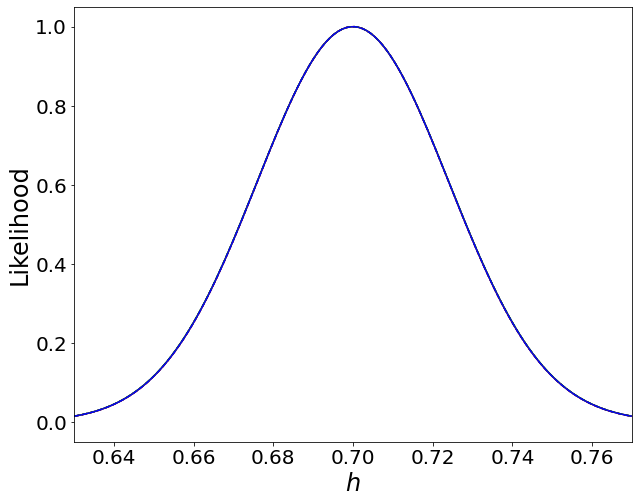

In [140]:
fig = plt.figure(figsize=[10,8])

plt.plot(values_h, norm_hLCDM_M7_B, color ='red')
plt.plot(values_h, norm_hCPL_M7_B, 'green')
plt.plot(values_h, norm_hBEK_M7_B, color ='blue')

plt.plot(values_h, norm_hLCDM_M7_O, color ='red',linestyle='--')
plt.plot(values_h, norm_hCPL_M7_O, 'green',linestyle='--')
plt.plot(values_h, norm_hBEK_M7_O, color ='blue',linestyle='--')

#plt.plot(values_zeta, norm_zetaCPLLCDM_RedAlphaO_Liske, 'darkorange', linestyle='--')

plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylabel('Likelihood', fontsize=24)
plt.xlabel('$h$',fontsize=24)
plt.xlim(0.63,0.77)

#plt.savefig('LikelihoodCPL_zeta.png', dpi=300, bbox_inches='tight')
#plt.close()

In [113]:
#OmegaM

##Baseline

#LambdaCDM
standard_deviation_OmegaMLCDM_M7_B = Sigmas(M7_B_LCDM)[1]
likelihood_OmegaMLCDM_M7_B = scipy.stats.norm(mean_OmegaM, standard_deviation_OmegaMLCDM_M7_B)
norm_OmegaMLCDM_M7_B=Standardization(likelihood_OmegaMLCDM_M7_B.pdf(values_OmegaM))

#CPL
standard_deviation_OmegaMCPL_M7_B = Sigmas(M7_B_CPL)[1]
likelihood_OmegaMCPL_M7_B = scipy.stats.norm(mean_OmegaM, standard_deviation_OmegaMCPL_M7_B)
norm_OmegaMCPL_M7_B=Standardization(likelihood_OmegaMCPL_M7_B.pdf(values_OmegaM))

#Bekenstein
standard_deviation_OmegaMBEK_M7_B = Sigmas(M7_B_BEK)[1]
likelihood_OmegaMBEK_M7_B = scipy.stats.norm(mean_OmegaM, standard_deviation_OmegaMBEK_M7_B)
norm_OmegaMBEK_M7_B=Standardization(likelihood_OmegaMBEK_M7_B.pdf(values_OmegaM))

##Optimistic

#LambdaCDM
standard_deviation_OmegaMLCDM_M7_O = Sigmas(M7_O_LCDM)[1]
likelihood_OmegaMLCDM_M7_O = scipy.stats.norm(mean_OmegaM, standard_deviation_OmegaMLCDM_M7_O)
norm_OmegaMLCDM_M7_O=Standardization(likelihood_OmegaMLCDM_M7_O.pdf(values_OmegaM))

#CPL
standard_deviation_OmegaMCPL_M7_O = Sigmas(M7_O_CPL)[1]
likelihood_OmegaMCPL_M7_O = scipy.stats.norm(mean_OmegaM, standard_deviation_OmegaMCPL_M7_O)
norm_OmegaMCPL_M7_O=Standardization(likelihood_OmegaMCPL_M7_O.pdf(values_OmegaM))

#Bekenstein
standard_deviation_OmegaMBEK_M7_O = Sigmas(M7_O_BEK)[1]
likelihood_OmegaMBEK_M7_O = scipy.stats.norm(mean_OmegaM, standard_deviation_OmegaMBEK_M7_O)
norm_OmegaMBEK_M7_O=Standardization(likelihood_OmegaMBEK_M7_O.pdf(values_OmegaM))



(0.28, 0.32)

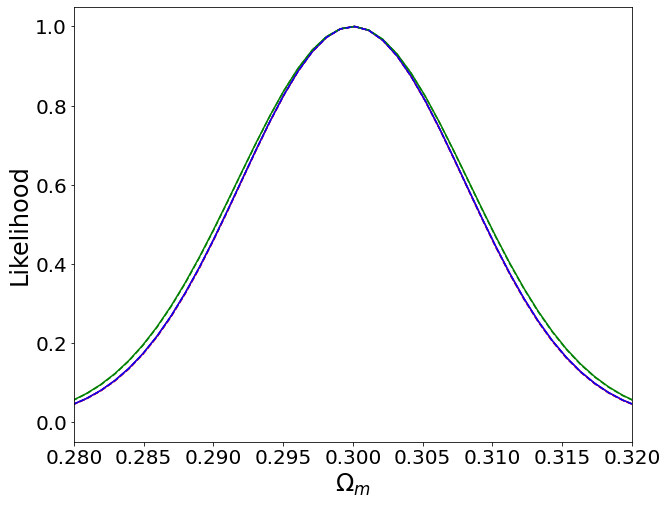

In [116]:
fig = plt.figure(figsize=[10,8])

plt.plot(values_OmegaM, norm_OmegaMLCDM_M7_B, color ='red')
plt.plot(values_OmegaM, norm_OmegaMCPL_M7_B, 'green')
plt.plot(values_OmegaM, norm_OmegaMBEK_M7_B, color ='blue')

plt.plot(values_OmegaM, norm_OmegaMLCDM_M7_O, color ='red',linestyle='--')
plt.plot(values_OmegaM, norm_OmegaMCPL_M7_O, 'green',linestyle='--')
plt.plot(values_OmegaM, norm_OmegaMBEK_M7_O, color ='blue',linestyle='--')

#plt.plot(values_zeta, norm_zetaCPLLCDM_RedAlphaO_Liske, 'darkorange', linestyle='--')

plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylabel('Likelihood', fontsize=24)
plt.xlabel('$\Omega_m$',fontsize=24)
plt.xlim(0.28,0.32)

#plt.savefig('LikelihoodCPL_zeta.png', dpi=300, bbox_inches='tight')
#plt.close()

In [117]:
#w0

##CPL

#Baseline
standard_deviation_w0CPL_M7_B = Sigmas(M7_B_CPL)[2]
likelihood_w0CPL_M7_B = scipy.stats.norm(mean_w0, standard_deviation_w0CPL_M7_B)
norm_w0CPL_M7_B=Standardization(likelihood_w0CPL_M7_B.pdf(values_w0))

#Optimistic
standard_deviation_w0CPL_M7_O = Sigmas(M7_O_CPL)[2]
likelihood_w0CPL_M7_O = scipy.stats.norm(mean_w0, standard_deviation_w0CPL_M7_O)
norm_w0CPL_M7_O=Standardization(likelihood_w0CPL_M7_O.pdf(values_w0))

(-1.2, -0.6)

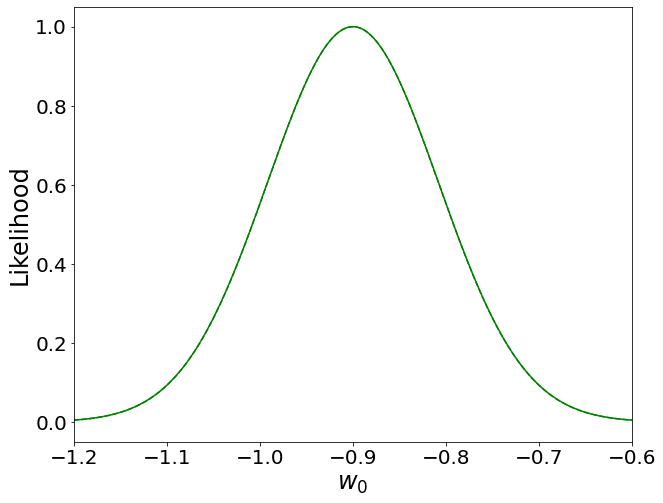

In [118]:
fig = plt.figure(figsize=[10,8])

#plt.plot(values_w0, norm_w0LCDM_M7_B, color ='red')
plt.plot(values_w0, norm_w0CPL_M7_B, 'green')

plt.plot(values_w0, norm_w0CPL_M7_O, 'green',linestyle='--')

#plt.plot(values_OmegaM, norm_OmegaMBEK_M7_B, color ='blue')

#plt.plot(values_zeta, norm_zetaCPLLCDM_RedAlphaO_Liske, 'darkorange', linestyle='--')

plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylabel('Likelihood', fontsize=24)
plt.xlabel('$w_0$',fontsize=24)
plt.xlim(-1.2,-0.6)

#plt.savefig('LikelihoodCPL_zeta.png', dpi=300, bbox_inches='tight')
#plt.close()

In [119]:
#wa

#CPL

#Baseline
standard_deviation_waCPL_M7_B = Sigmas(M7_B_CPL)[3]
likelihood_waCPL_M7_B = scipy.stats.norm(mean_wa, standard_deviation_waCPL_M7_B)
norm_waCPL_M7_B=Standardization(likelihood_waCPL_M7_B.pdf(values_wa))

#Optimistic
standard_deviation_waCPL_M7_O = Sigmas(M7_O_CPL)[3]
likelihood_waCPL_M7_O = scipy.stats.norm(mean_wa, standard_deviation_waCPL_M7_O)
norm_waCPL_M7_O=Standardization(likelihood_waCPL_M7_O.pdf(values_wa))

(-0.4, 1.0)

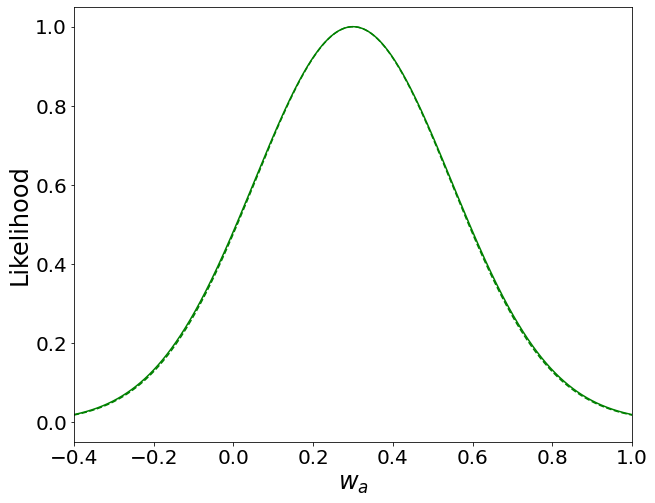

In [122]:
fig = plt.figure(figsize=[10,8])

#plt.plot(values_w0, norm_w0LCDM_M7_B, color ='red')
plt.plot(values_wa, norm_waCPL_M7_B, 'green')
plt.plot(values_wa, norm_waCPL_M7_O, 'green', linestyle='--')

#plt.plot(values_OmegaM, norm_OmegaMBEK_M7_B, color ='blue')

#plt.plot(values_zeta, norm_zetaCPLLCDM_RedAlphaO_Liske, 'darkorange', linestyle='--')

plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylabel('Likelihood', fontsize=24)
plt.xlabel('$w_a$',fontsize=24)
plt.xlim(-0.4,1)

#plt.savefig('LikelihoodCPL_zeta.png', dpi=300, bbox_inches='tight')
#plt.close()

In [123]:
#ZetaM

#Bekenstein

#Baseline
standard_deviation_ZetaMBEK_M7_B = Sigmas(M7_B_BEK)[2]
likelihood_ZetaMBEK_M7_B = scipy.stats.norm(mean_zeta, standard_deviation_ZetaMBEK_M7_B)
norm_ZetaMBEK_M7_B=Standardization(likelihood_ZetaMBEK_M7_B.pdf(values_zeta))

#Optimistic
standard_deviation_ZetaMBEK_M7_O = Sigmas(M7_O_BEK)[2]
likelihood_ZetaMBEK_M7_O = scipy.stats.norm(mean_zeta, standard_deviation_ZetaMBEK_M7_O)
norm_ZetaMBEK_M7_O=Standardization(likelihood_ZetaMBEK_M7_O.pdf(values_zeta))

(-0.4, 0.2)

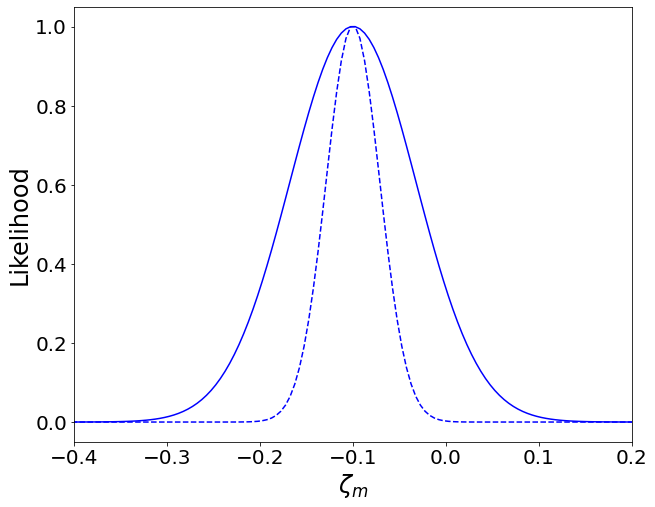

In [124]:
fig = plt.figure(figsize=[10,8])

#plt.plot(values_w0, norm_w0LCDM_M7_B, color ='red')
#plt.plot(values_wa, norm_waCPL_M7_B, 'green')

plt.plot(values_zeta, norm_ZetaMBEK_M7_B, color ='blue')
plt.plot(values_zeta, norm_ZetaMBEK_M7_O, color ='blue', linestyle='--')

#plt.plot(values_zeta, norm_zetaCPLLCDM_RedAlphaO_Liske, 'darkorange', linestyle='--')

plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylabel('Likelihood', fontsize=24)
plt.xlabel('$\zeta_m$',fontsize=24)
plt.xlim(-0.4,0.2)

#plt.savefig('LikelihoodCPL_zeta.png', dpi=300, bbox_inches='tight')
#plt.close()

In [127]:
#ZetaL

#Bekenstein

#Baseline
standard_deviation_ZetaLBEK_M7_B = Sigmas(M7_B_BEK)[3]
likelihood_ZetaLBEK_M7_B = scipy.stats.norm(mean_zeta, standard_deviation_ZetaLBEK_M7_B)
norm_ZetaLBEK_M7_B=Standardization(likelihood_ZetaLBEK_M7_B.pdf(values_zeta))

#Optimistic
standard_deviation_ZetaLBEK_M7_O = Sigmas(M7_O_BEK)[3]
likelihood_ZetaLBEK_M7_O = scipy.stats.norm(mean_zeta, standard_deviation_ZetaLBEK_M7_O)
norm_ZetaLBEK_M7_O=Standardization(likelihood_ZetaLBEK_M7_O.pdf(values_zeta))

(-1.4, 1.2)

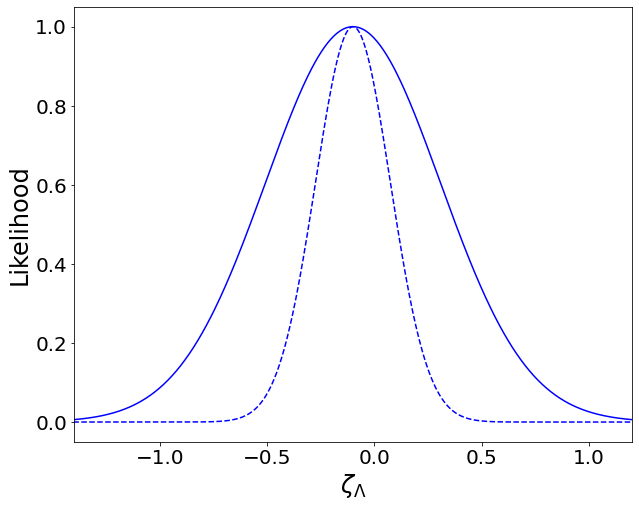

In [135]:
fig = plt.figure(figsize=[10,8])

#plt.plot(values_w0, norm_w0LCDM_M7_B, color ='red')
#plt.plot(values_wa, norm_waCPL_M7_B, 'green')

plt.plot(values_zeta, norm_ZetaLBEK_M7_B, color ='blue')
plt.plot(values_zeta, norm_ZetaLBEK_M7_O, color ='blue', linestyle='--')

#plt.plot(values_zeta, norm_zetaCPLLCDM_RedAlphaO_Liske, 'darkorange', linestyle='--')

plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylabel('Likelihood', fontsize=24)
plt.xlabel('$\zeta_\Lambda$',fontsize=24)
plt.xlim(-1.4,1.2)

#plt.savefig('LikelihoodCPL_zeta.png', dpi=300, bbox_inches='tight')
#plt.close()

In [133]:
#Zeta

#CPL

#Baseline
standard_deviation_ZetaCPL_M7_B = Sigmas(M7_B_CPL)[4]
likelihood_ZetaCPL_M7_B = scipy.stats.norm(mean_zeta, standard_deviation_ZetaCPL_M7_B)
norm_ZetaCPL_M7_B=Standardization(likelihood_ZetaCPL_M7_B.pdf(values_zeta))

#Optimistic
standard_deviation_ZetaCPL_M7_O = Sigmas(M7_O_CPL)[4]
likelihood_ZetaCPL_M7_O = scipy.stats.norm(mean_zeta, standard_deviation_ZetaCPL_M7_O)
norm_ZetaCPL_M7_O=Standardization(likelihood_ZetaCPL_M7_O.pdf(values_zeta))

(-0.3, 0.1)

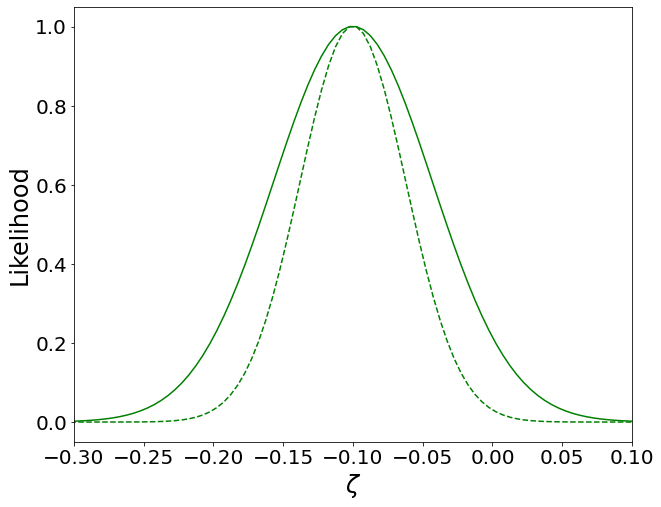

In [138]:
fig = plt.figure(figsize=[10,8])

#plt.plot(values_w0, norm_w0LCDM_M7_B, color ='red')

plt.plot(values_zeta, norm_ZetaCPL_M7_B, 'green')
plt.plot(values_zeta, norm_ZetaCPL_M7_O, 'green',linestyle='--')

#plt.plot(values_zeta, norm_ZetaLBEK_M7_B, color ='blue')
#plt.plot(values_zeta, norm_ZetaLBEK_M7_O, color ='blue', linestyle='--')

#plt.plot(values_zeta, norm_zetaCPLLCDM_RedAlphaO_Liske, 'darkorange', linestyle='--')

plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylabel('Likelihood', fontsize=24)
plt.xlabel('$\zeta$',fontsize=24)
plt.xlim(-0.3,0.1)

#plt.savefig('LikelihoodCPL_zeta.png', dpi=300, bbox_inches='tight')
#plt.close()